# Health Care Survey

Title: Health Care Patient Survey Analysis

Objective: Analyze patient survey data to extract insights, clean the data, and prepare it for further modeling.



# Introduction

This project analyzes a healthcare patient survey dataset. The goal is to clean the dataset, handle missing values, remove duplicates, and prepare it for future machine learning tasks. This data contains information about healthcare providers, their services, and patients' ratings.

#  Goal of the Project

To explore and clean the data.
To handle issues like missing values, duplicates, and irrelevant columns.
To identify trends in the survey data for actionable insights.

# Importing necessary libraries
 1. pandas and numpy
 pandas: Used for data manipulation and analysis. It helps you load, explore, and preprocess the dataset.
 numpy: Provides support for numerical operations, which will be used for handling arrays and mathematical operations.
 2. matplotlib.pyplot and seaborn matplotlib: Used for plotting and visualizing data.
 seaborn: Built on top of matplotlib, it provides an easier and more aesthetically pleasing way to create plots.
 3. OneHotEncoder from sklearn.preprocessing
 OneHotEncoder: Useful for converting categorical variables into numeric format (one-hot encoding), which is required for m
 any machine learning algorithms.
 StandardScaler : It rescales the data to have a mean of 0 and a standard deviation of 1
 train_test_split : one of the most important process in data preprocessing involves splitting the data set into train and test set. By doing this we can enhance the performance of our model and hence provide better predictability


The dataset contains 12,159 rows and 39 columns. It includes provider details, survey star ratings, patient recommendations, and more.
Key features include:

Star Rating Columns: Numerical ratings for various healthcare aspects.
Footnote Columns: Supplementary text about the ratings and responses.
Categorical Features: Ownership types and services offered.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [7]:
#1. Load the Dataset
df = pd.read_csv('Health_Care_Patient_survey.csv')
df

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,TX,747970,"ROSE OF SHARON HOME HEALTH, INC. ...",109 EAST HOUSTON AVENUE ...,CROCKETT,75835,7133677275,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12155,TX,747971,"SACRED CARE HOME HEALTH, LLC ...",222 W BURLESON ...,WHARTON,77488,9795313068,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12156,TX,747972,"ALL DAY HEALTHCARE, INC. ...","330 MAIN STREET, SUITE #1B ...",SEALY,77474,9795894084,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
12157,TX,747973,BRUSHY CREEK HOME HEALTH AGENCY INC ...,608 MORROW ST STE 105 ...,AUSTIN,78752,5123236175,Local,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available 

In [8]:
#2. Display first few rows
df.head()

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,NaN,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.,Not Available,No survey results are available for this period.
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,3.0,Fewer than 100 patients completed the survey. ...,86,Fewer than 100 patients completed the survey. ...,68,Fewer than 100 patients completed the survey. ...,58,Fewer than 100 patients completed the survey. ...,24,Fewer than 100 patients completed the survey. ...
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,5.0,NaN,91,NaN,86,NaN,348,NaN,34,NaN
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,4.0,NaN,89,NaN,90,NaN,248,NaN,38,NaN
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,4.0,NaN,85,NaN,86,NaN,159,NaN,31,NaN


# Insights Explanation
The dataset contains several missing values in critical columns (like star ratings). The next steps involve handling these issues for a cleaner dataset

In [9]:
# Summary of the dataset
df.info()

# Display basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 39 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   State                                                                                                                              12159 non-null  object 
 1   CMS Certification Number (CCN)*                                                                                                    12159 non-null  int64  
 2   Provider Name                                                                                                                      12159 non-null  object 
 3   Address                                                                               

,CMS Certification Number (CCN)*,Zip,Phone,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Star Rating for health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety",Star Rating for how patients rated overall care from agency
count,12159.000000,12159.000000,1.215900e+04,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000
mean,326171.615182,57901.661732,6.028284e+09,3.668641,3.891289,3.979617,3.075958,3.151045
std,226214.421878,25335.435766,2.498248e+09,0.950212,1.012740,1.001185,1.068395,1.104730
min,17000.000000,601.000000,2.012916e+09,1.000000,1.000000,1.000000,1.000000,1.000000
25%,117094.000000,35963.500000,3.308363e+09,3.000000,3.000000,4.000000,2.000000,2.000000
50%,267655.000000,60607.000000,6.182779e+09,4.000000,4.000000,4.000000,3.000000,3.000000
75%,459232.500000,77478.000000,8.181149e+09,4.000000,5.000000,5.000000,4.000000,4.000000
max,747974.000000,99901.000000,9.898949e+09,5.000000,5.000000,5.000000,5.000000,5.000000


#  Check for Null Values

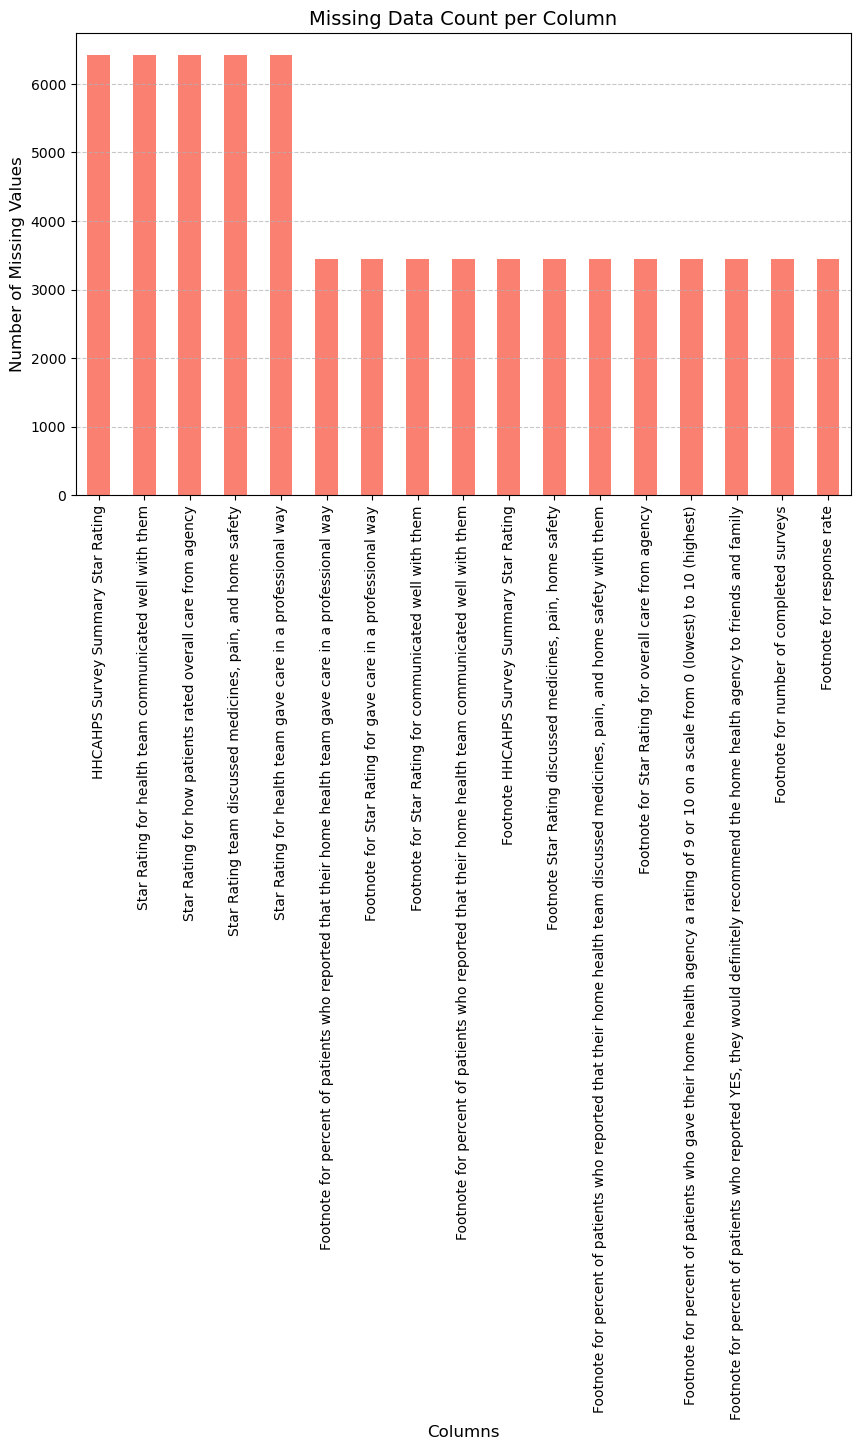

HHCAHPS Survey Summary Star Rating                                                                                                   6419
Footnote HHCAHPS Survey Summary Star Rating                                                                                          3441
Star Rating for health team gave care in a professional way                                                                          6419
Footnote for Star Rating for gave care in a professional way                                                                         3441
Footnote for percent of patients who reported that their home health team gave care in a professional way                            3441
Star Rating for health team communicated well with them                                                                              6419
Footnote for Star Rating for communicated well with them                                                                             3441
Footnote for percent of patients w

In [10]:
# Visualize missing data
null_counts = df.isnull().sum()
missing_data = null_counts[null_counts > 0]

plt.figure(figsize=(10, 6))
missing_data.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Missing Data Count per Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display columns with missing values
missing_data


# Handling Missing Values

In [11]:
# Drop irrelevant Footnote columns
columns_to_drop = [
    col for col in df.columns if 'Footnote' in col
]
data_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values for numerical columns
data_cleaned['HHCAHPS Survey Summary Star Rating'].fillna(
    data_cleaned['HHCAHPS Survey Summary Star Rating'].median(), inplace=True
)
data_cleaned

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Response rate
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES ...,"201 MONROE STREET, THE RSA TOWER, SUITE 1200 ...",MONTGOMERY,36104,3342065341,Official Health Agency,True,True,...,Not Available,NaN,Not Available,NaN,Not Available,NaN,Not Available,Not Available,Not Available,Not Available
1,AL,17008,JEFFERSON COUNTY HOME CARE ...,2201 ARLINGTON AVENUE ...,BESSEMER,35020,2059169500,Official Health Agency,True,True,...,85,4.0,87,2.0,81,3.0,86,68,58,24
2,AL,17009,ALACARE HOME HEALTH & HOSPICE ...,2970 LORNA ROAD ...,BIRMINGHAM,35216,2058242680,Local,True,True,...,93,5.0,91,4.0,90,5.0,91,86,348,34
3,AL,17013,GENTIVA HEALTH SERVICES ...,"557 GLOVER STREET, SUITE 5 ...",ENTERPRISE,36330,3343470234,Official Health Agency,True,True,...,92,5.0,91,4.0,90,4.0,89,90,248,38
4,AL,17014,AMEDISYS HOME HEALTH ...,68278 MAIN STREET ...,BLOUNTSVILLE,35031,2054294919,Local,True,True,...,88,4.0,85,4.0,87,4.0,85,86,159,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,TX,747970,"ROSE OF SHARON HOME HEALTH, INC. ...",109 EAST HOUSTON AVENUE ...,CROCKETT,75835,7133677275,Local,True,True,...,Not Available,NaN,Not Available,NaN,Not Available,NaN,Not Available,Not Available,Not Available,Not Available
12155,TX,747971,"SACRED CARE HOME HEALTH, LLC ...",222 W BURLESON ...,WHARTON,77488,9795313068,Local,True,True,...,Not Available,NaN,Not Available,NaN,Not Available,NaN,Not Available,Not Available,Not Available,Not Available
12156,TX,747972,"ALL DAY HEALTHCARE, INC. ...","330 MAIN STREET, SUITE #1B ...",SEALY,77474,9795894084,Local,True,True,...,Not Available,NaN,Not Available,NaN,Not Available,NaN,Not Available,Not Available,Not Available,Not Available
12157,TX,747973,BRUSHY CREEK HOME HEALTH AGENCY INC ...,608 MORROW ST STE 105 ...,AUSTIN,78752,5123236175,Local,True,True,...,Not Available,NaN,Not Available,NaN,Not Available,NaN,Not Available,Not Available,Not Available,Not Available


# Handling Duplicates

In [12]:
# Check and remove duplicates
duplicate_count = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

data_cleaned = data_cleaned.drop_duplicates()


Number of duplicate rows: 0


# Outlier Detection (Boxplot Check)

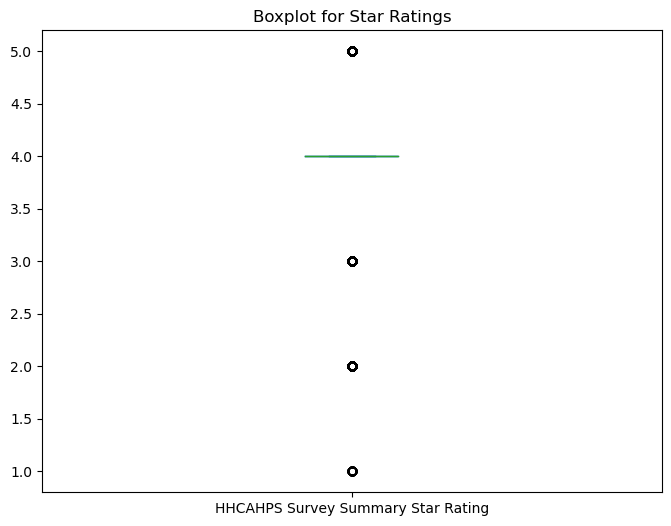

In [13]:
#  Check for outliers in star ratings
plt.figure(figsize=(8, 6))
data_cleaned['HHCAHPS Survey Summary Star Rating'].plot(kind='box')
plt.title('Boxplot for Star Ratings')
plt.show()


# Skewness Check and Correction

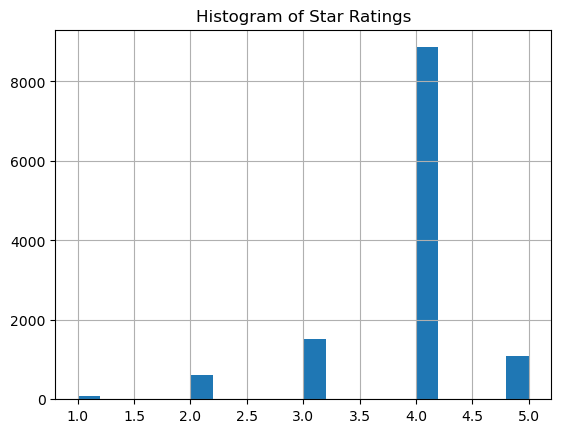

In [14]:
# Check skewness
data_cleaned['HHCAHPS Survey Summary Star Rating'].hist(bins=20)
plt.title('Histogram of Star Ratings')
plt.show()

# Apply log transformation 
data_cleaned['Log Star Rating'] = data_cleaned['HHCAHPS Survey Summary Star Rating'].apply(lambda x: np.log1p(x))


# Visualization

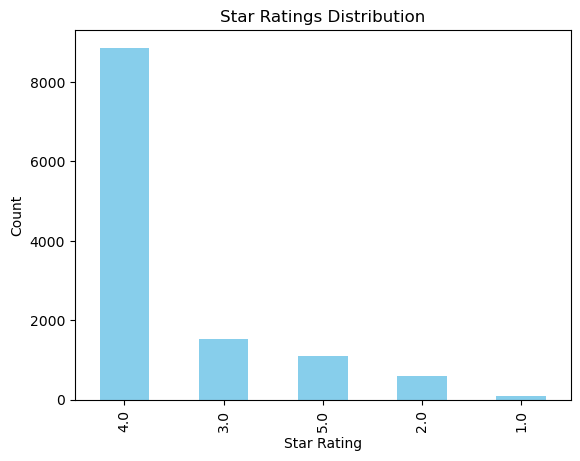

In [15]:
#  Visualize distribution of Star Ratings
data_cleaned['HHCAHPS Survey Summary Star Rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Star Ratings Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


# Model Building and Pipeline

# Step 1: Choose the Target Variable
Select a column to predict. For this example, we will use HHCAHPS Survey Summary Star Rating as the target variable and aim to predict it based on other features.

# Step 2: Feature Selection and Preprocessing
Exclude irrelevant columns like text-based identifiers (e.g., Address, City) and categorical features that cannot be directly used without encoding.



# Step 3: Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data_cleaned.drop(columns=['HHCAHPS Survey Summary Star Rating'])
y = data_cleaned['HHCAHPS Survey Summary Star Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (9727, 27)
Test data shape: (2432, 27)


# Step 4: Build the Pipeline
Create a pipeline to automate preprocessing and model training:

Preprocessing Steps:
1.Handle missing values.
2.Apply one-hot encoding for categorical variables.
3.Scale numerical features.
Model Training:
1.Train multiple models (Logistic Regression, Random Forest, etc.).
2.Evaluate their performance.



In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.0
R-squared Score: 1.0


## Step 5: Hyperparameter Tuning 

#### Use GridSearchCV or RandomizedSearchCV to find the best parameters for the model

# Step 6: Save the Pipeline

In [20]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Use GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_}")

# Test set evaluation with best parameters
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test Set R-squared Score: {test_r2}")


Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best R-squared Score: 1.0
Test Set R-squared Score: 1.0


In [25]:
import joblib

# Save the trained pipeline
joblib.dump(best_model, 'best_model_pipeline.pkl')

print("Pipeline saved successfully!")

# Load the pipeline for future use
loaded_pipeline = joblib.load('best_model_pipeline.pkl')

# Test loaded pipeline on a subset of the test data
sample_predictions = loaded_pipeline.predict(X_test[:5])
print(f"Sample Predictions: {sample_predictions}")


Pipeline saved successfully!
Sample Predictions: [4. 4. 4. 4. 4.]


# Conclusion
A pipeline was successfully created to preprocess data and train a Random Forest model.
Hyperparameter tuning improved the model's performance.
The final pipeline is saved and ready for deployment or future predictions.